In [160]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [161]:
N = 200
x_start, x_end = -4.0, 4.0
y_start, y_end = -2.0, 2.0
x = numpy.linspace(x_start, x_end,N)
y = numpy.linspace(y_start, y_end,N)
X, Y = numpy.meshgrid(x,y)

In [162]:
numpy.shape(X)

(200, 200)

## Source in a uniform flow

The streamlines of a freestream with speed $U_\infty$ and angle of attack $\alpha$ are given by:

$$\psi_\text{freestream}\left(x,y\right)=U_\infty \left(y\cos\alpha - x\sin\alpha\right)$$

In [163]:
u_inf = 1.0
a = 0*numpy.pi

u_freestream = u_inf*math.cos(a)*numpy.ones((N,N),dtype = float)
v_freestream = u_inf*math.sin(a)*numpy.ones((N,N),dtype = float)

psi_freestream = u_inf*(Y*math.cos(a)-X*math.sin(a))

From our previous *AeroPython* notebook, the stream function of a source flow located at $\left(x_\text{source},y_\text{source}\right)$ is:

$$\psi_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

and the velocity components are:

$$u_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

$$v_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

In [164]:
def get_velocity(strength, xs, ys, X, Y):

    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [165]:
def get_stream_function(strength, xs, ys, X, Y):

    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
#numpy.arctan2((Y-ys)*math.cos(a), X*math.sin(a))
    
    return psi

In [166]:
strength_source = 5.0

x_source, y_source = -1.0, 0.0 

u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

The streamlines of the combination of a freestream and a source flow are:

$$\psi = \psi_{freestream}+\psi_{source} = U_\infty y + \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

And since differentiation is linear, the velocity field induced by the new flow pattern is simply the sum of the freestream velocity field and the source velocity field:

$$u = u_\text{freestream} + u_\text{source}$$
$$v = v_\text{freestream} + v_\text{source}$$

The stagnation points in the flow are points where the velocity is zero (stagnant fluid, get it?). To find their location, we solve the following equations:

$$u = 0 , \quad v = 0$$

which leads to:

$$x_\text{stagnation} = x_\text{source} - \frac{\sigma}{2\pi U_\infty}$$

$$y_\text{stagnation} = y_\text{source}$$

The streamline containing the stagnation point is called the *dividing streamline*. 

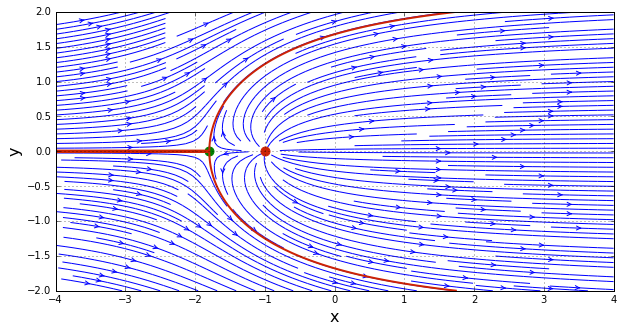

In [167]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source


size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')


x_stagnation = x_source - math.cos(a)*strength_source/(2*numpy.pi*u_inf)
y_stagnation = y_source - math.sin(a)*strength_source/(2*numpy.pi*u_inf)


pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')


pyplot.contour(X, Y, psi, 
            levels=[-strength_source/2, +strength_source/2], 
            colors='#CD2305', linewidths=2, linestyles='solid');

In [168]:
strength_sink = -5.0

x_sink, y_sink = 1.0, 0.0

u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

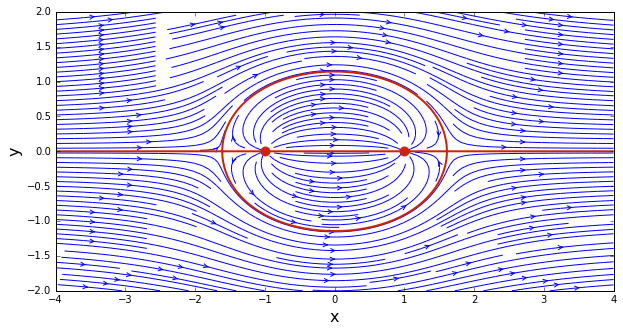

In [169]:
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid');

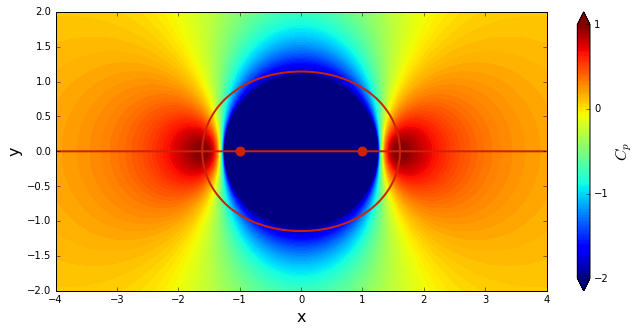

In [170]:
cp = 1.0 - (u**2+v**2)/u_inf**2

size = 10
pyplot.figure(figsize=(1.1*size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink], color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');